# Exam questions

1. Stationary and non-stationary timeseries
2. ARMA models
3. ARIMA models
4. Autocorrelation
5. Trend models
6. Spurious correlations and cointegration
7. Errorcorrection models
8. Volatility clustering - how to spot it empirically - ARCH / GARCH
9. Conditional and unconditional average and variance (ARMA(1,1) - ARCH)
10. Stationarity condition for AR(1), AR(p), VAR(p) and ARCH models
11. Relevant hypothesis testing - diagnosticing AR og ARCH/GARCH
12. Forecasting in AR, ARMA, ARCH/GARCH
13. ARCH og GARCH models
14. Structural shifts - consequense for parametre estimates and unit root tests
15. VAR and structural VAR models
16. Impulse response analisis
17. How to handle a trend in AR, VAR, og ARCH/GARCH

In [44]:
library(repr)

options(repr.plot.width=6, repr.plot.height=2)

### 1. Stationary and non-stationary timeseries

#### Example (is it stationary?)
$$y_t = 1.1y_{t-1} - 0.18y_{t-2} + u_t$$
first we check if sum of coefiecients are smaller than 1, and yes they are 
$$1.1 - 0.18 < 1$$
Then we check if the absolute sum is smaller than 1, it is not 
$$1.1 + 0.18 > 1$$
So we have to calculate the roots:

In [48]:
a1 <- 1.1
a2 <- -0.18
d <- a1^2 + 4*a2
d

[1] 0.49

The discriminant is positive so we have real roots, yay :) Now we calculate the roots and with them create the homogeneous solution

[1] 0.9

[1] 0.2

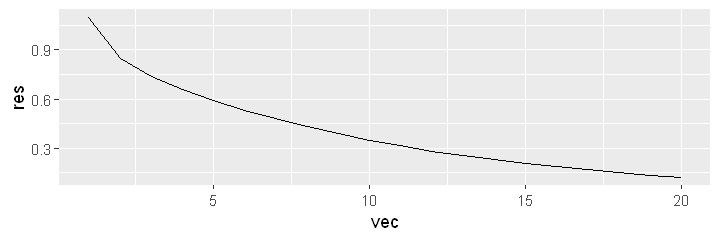

In [47]:
library(ggplot2)
a <- 0.5*(a1+d^0.5)
b <- 0.5*(a1-d^0.5)
a
b
vec <- 1:20
res <- (a)^vec + (b)^vec

ggplot() + 
    geom_line(aes(vec,res))

Now we calculate the mean, variance and autocovariance

In [86]:
mean <- 0/(1-a1-a2)
varians <- ((1-a2)*1)/((1+a2)*(((1-a2)^2)-(a1^2)))
covarians <- (a1*1)/((1+a2)*(((1-a2)^2)-(a1^2)))

mean
varians
covarians

[1] 0

[1] 7.889388

[1] 7.354514

We can test if this is correct with the following for loop in R

In [91]:
AR_mean <- NA
AR_var <- NA
AR_cov <- NA
for (i in 1:1000) {
 sim <- arima.sim(n = 100, list(order=c(2,0,0), ar=c(a1,a2)))
AR_mean[i] <- mean(sim)
AR_var[i] <- var(sim)  
AR_cov[i] <- acf(sim, lag.max = 1, plot = F, type="covariance")$acf[2]
}
mean(AR_mean)
mean(AR_var)
mean(AR_cov)

[1] 0.03914312

[1] 6.524494

[1] 5.855774

### 2. ARMA models

Explain variations in a variable with previous variations in the same variable. This adds to the complexity as with timeseries we can't assume random population of the dependent variable

Autoregressive part explains the variation as being a function of the previous value of the variable 
$$y_t = \alpha y_{t-1} + u_t$$

Moving average part explains the variation as being a function of the previous error of the model 
$$y_t = a + \beta u_{t-1} + u_t$$

Either roots inside the unit circle for the characteristic polynomial; or 
roots outside the unit circle for the lag polynomium

#### Conversion of processes
Interesting thing is that an MA process can be converted to an AR and reverse, here is an example of that:
$$AR(1) = MA(\infty)$$
if
$$y_t = 0.5 y_{t-1} + u_t$$
is the same as
$$ y_t = 0.5 u_{t-1} + 0.25 u_{t-2} + 0.125 u_{t-3} + ... + u_t $$

#### Lag operators
Starting with an AR(1) process
$$y_t = \alpha y_{t-1} + u_t$$
is the same as
$$y_t = \alpha L y_{t} + u_t$$
is the same as
$$y_t(1-\alpha L) = u_t$$

We can use this to show how AR(1) is equal to an MA(inf) process. first we multiply with a thing on both sides

$$(1-\alpha L) * (1+\alpha L + \alpha^2L^2 + ...)$$
This equals 
$$(1-\alpha^{t+1}L^{t+1})$$

This means we can multiply with the inf expression on both sides of the equation and get

$$y_t(1-\alpha^{t+1}L^{t+1}) = u_t(1+\alpha L + \alpha^2L^2 + ...)$$
and solve for $y_t$
$$y_t = \alpha^{t+1}y_{-1} + u_t +\alpha u_{t-1} + \alpha^2 u_{t-2} + ...$$
So if $\alpha$ is (numeric) less than 1 then:

$$y_t = u_t +\alpha u_{t-1} + \alpha^2 u_{t-2} + ...$$

In [36]:
# AR(1) to MA(Inf)
MAcoef <- ARMAtoMA(ar = 0.5, ma = 0, lag.max=6)

# MA(1) to AR(Inf)
ARcoef <- ARMAtoMA(ar = -0.5, ma = 0, lag.max=6)
data.frame(MAcoef,ARcoef)

MAcoef,ARcoef
0.500000,-0.500000
0.250000,0.250000
0.125000,-0.125000
0.062500,0.062500
0.031250,-0.031250
0.015625,0.015625


### 3. ARIMA models

The same as ARMA models plus the I for Integrated


### 4. Autocorrelation

### 5. Trend models

### 6. Spurious correlations and cointegration

### 7. Errorcorrection models

### 8. Volatility clustering - how to spot it empirically - ARCH / GARCH

### 9. Conditional and unconditional average and variance (ARMA(1,1) - ARCH)

### 10. Stationarity condition for AR(1), AR(p), VAR(p) and ARCH models

### 11. Relevant hypothesis testing - diagnosticing AR og ARCH/GARCH

### 12. Forecasting in AR, ARMA, ARCH/GARCH

### 13. ARCH og GARCH models

### 14. Structural shifts - consequense for parametre estimates and unit root tests

### 15. VAR and structural VAR models

$$ y_t=b_{10} - b_{12}z_t + \gamma_{11}y_{t-1} + \gamma_{12}z_{t-1}+\varepsilon_{yt} $$
$$ z_t=b_{20} - b_{21}y_t + \gamma_{21}y_{t-1} + \gamma_{22}z_{t-1}+\varepsilon_{zt} $$

Dette kan omskrives på vektor formel til en VAR(1)

$$
\begin{bmatrix} 1 & b_{12} \\ b_{12} & 1 \end{bmatrix}
\begin{bmatrix} y_t \\ z_t \end{bmatrix}
=
\begin{bmatrix} b_{10} \\ b_{20} \end{bmatrix}
+
\begin{bmatrix} \gamma_{11} & \gamma_{12} \\ \gamma_{21} & \gamma_{22} \end{bmatrix}
\begin{bmatrix} y_{t-1} \\ z_{t-1} \end{bmatrix}
+
\begin{bmatrix} \varepsilon_{yt} \\ \varepsilon_{zt} \end{bmatrix}
$$
kan skrives om til 

$$
\begin{bmatrix} y_t \\ z_t \end{bmatrix}
=
\begin{bmatrix} 1 & b_{12} \\ b_{12} & 1 \end{bmatrix}^{-1}
\begin{bmatrix} b_{10} \\ b_{20} \end{bmatrix}
+
\begin{bmatrix} 1 & b_{12} \\ b_{12} & 1 \end{bmatrix}^{-1}
\begin{bmatrix} \gamma_{11} & \gamma_{12} \\ \gamma_{21} & \gamma_{22} \end{bmatrix}
\begin{bmatrix} y_{t-1} \\ z_{t-1} \end{bmatrix}
+
\begin{bmatrix} 1 & b_{12} \\ b_{12} & 1 \end{bmatrix}^{-1}
\begin{bmatrix} \varepsilon_{yt} \\ \varepsilon_{zt} \end{bmatrix}
$$

Dette skrives også helt kort som
$$ x_t = A_0 + A_1x_{t-1} + \epsilon_t $$




### 16. Impulse response analisis

### 17. How to handle a trend in AR, VAR, og ARCH/GARCH